In [1]:
rootdir0 = 'no_interaction'
rootdir1 = 'open_close_fridge'
rootdir2 = 'put_back_item'
rootdir3 = 'screen_interaction'
rootdir4 = 'take_out_item'

rootdirs =[ rootdir0, rootdir1, rootdir2, rootdir3, rootdir4]

In [209]:
rootdirs[0]

'no_interaction'

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [4]:

persons = [1] # [1,2]

for p in persons:
    rootdir = rootdir1+"/"+str(p)

    nfiles= 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            npath = os.path.join(subdir, file)
            nfiles=nfiles+1
            
            if file.endswith(("1.mp4.npy")):
                print(npath)

open_close_fridge/1/open_close_fridge_5_1615392827_1.mp4.npy
open_close_fridge/1/open_close_fridge_10_1615393352_1.mp4.npy
open_close_fridge/1/open_close_fridge_8_1615393260_1.mp4.npy
open_close_fridge/1/open_close_fridge_17_1615393702_1.mp4.npy
open_close_fridge/1/open_close_fridge_14_1615393552_1.mp4.npy
open_close_fridge/1/open_close_fridge_1_1613085422_1.mp4.npy
open_close_fridge/1/open_close_fridge_15_1615393603_1.mp4.npy
open_close_fridge/1/open_close_fridge_9_1615393307_1.mp4.npy
open_close_fridge/1/open_close_fridge_7_1615393213_1.mp4.npy
open_close_fridge/1/open_close_fridge_18_1615393749_1.mp4.npy
open_close_fridge/1/open_close_fridge_19_1615393798_1.mp4.npy
open_close_fridge/1/open_close_fridge_3_1615392727_1.mp4.npy
open_close_fridge/1/open_close_fridge_20_1615393848_1.mp4.npy
open_close_fridge/1/open_close_fridge_2_1615392660_1.mp4.npy
open_close_fridge/1/open_close_fridge_5_1613085652_1.mp4.npy
open_close_fridge/1/open_close_fridge_16_1615393653_1.mp4.npy
open_close_fridg

In [89]:
#keypt = 10 # right wrist

#keypt = 8 # right elbow
keypt = 2 # "right_eye"
keypt = 4 # "right_ear"
keypt = 6 # right shoulder
keypt = 12 # "right_hip"
keypt = 14 # "right_knee"
#keypt = 16 # "right_ankle"

kypt_loc = 3*keypt
kypt_y = kypt_loc+1
kypt_z =kypt_loc+2

In [90]:
kypt_loc

42

In [6]:
def trim(file_path):
    x = np.load(file_path)
    n = x.shape[0]
    x = x.reshape(n, -1)

    is_trimming=True

    if is_trimming:
        thres = []
        # find threshold
        window = []
        for i in range(1, n):
            thres.append(sum(v ** 2 for v in x[i] - x[i - 1]))
        thres = [float(f'{v:.2f}') for v in thres]
        #print(file_path, thres)
        # quant = np.quantile([float(v) for v in thres], q = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1])
        # print(quant)
        # left, right = quant[1], quant[7]      # [left, right]
        # left, right = quant[1], quant[7]  # [left, right]
        res = []
        # only extract the frame (3d keyponts) that has human
        entry = False
        entry_idx = 0
        exit_idx = n
        for i in range(1, n - 1):
            if not entry and thres[i] > sum(
                    thres[:i]):  # find the entry frame (if current thre > sum of previous 5 thres)
                res.append(x[i])
                entry_idx = i
                entry = True
                #print(entry_idx, thres[i])
            elif entry and thres[i] > sum(thres[
                                          i + 1:]):  # thres[i] > sum(thres[i+1:i+5+1]) and thres[i+1] == 0.0: # find the entry frame (if current thre > sum of future 5 thres)
                exit_idx = i
                #print(exit_idx, thres[i])
                break
        if exit_idx == n:
            #print(thres)
            exit_idx = n
        res = x[entry_idx: exit_idx]
        print(f'{file_path} entry_idx: {entry_idx}, exit_idx: {exit_idx}, tot: {n}')
    else:
        res = x
    return res

In [6]:
# find max # frames in each folder with trimming

persons = [1] # [1,2]

shapes = []
# make map of matrix results
matmap = {}

for p in persons:
    rootdir = rootdir1+"/"+str(p)

    nfiles= 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            npath = os.path.join(subdir, file)
            
            
            if file.endswith(("1.mp4.npy")):
                print(npath)
                nfiles=nfiles+1
                
                trimmed_res = trim(npath)
                matmap[nfiles] = trimmed_res
                # shape
                s0 = np.shape(trimmed_res)[0]
                
                shapes.append(s0)

print("max num frames", max(shapes))

smax = max(shapes)

open_close_fridge/1/open_close_fridge_5_1615392827_1.mp4.npy
open_close_fridge/1/open_close_fridge_5_1615392827_1.mp4.npy entry_idx: 11, exit_idx: 109, tot: 325
open_close_fridge/1/open_close_fridge_10_1615393352_1.mp4.npy
open_close_fridge/1/open_close_fridge_10_1615393352_1.mp4.npy entry_idx: 22, exit_idx: 103, tot: 331
open_close_fridge/1/open_close_fridge_8_1615393260_1.mp4.npy
open_close_fridge/1/open_close_fridge_8_1615393260_1.mp4.npy entry_idx: 34, exit_idx: 112, tot: 340
open_close_fridge/1/open_close_fridge_17_1615393702_1.mp4.npy
open_close_fridge/1/open_close_fridge_17_1615393702_1.mp4.npy entry_idx: 27, exit_idx: 122, tot: 345
open_close_fridge/1/open_close_fridge_14_1615393552_1.mp4.npy
open_close_fridge/1/open_close_fridge_14_1615393552_1.mp4.npy entry_idx: 10, exit_idx: 102, tot: 334
open_close_fridge/1/open_close_fridge_1_1613085422_1.mp4.npy
open_close_fridge/1/open_close_fridge_1_1613085422_1.mp4.npy entry_idx: 22, exit_idx: 203, tot: 448
open_close_fridge/1/open_clo

In [8]:
m1 = matmap[1]
np.shape(m1)

(98, 51)

In [ ]:
# sept 5 integrate into 1 function

persons = [2,3,4,5,7] # [1,2]


x_tot= {}
y_tot= {}
z_tot= {}

x_std = {}
y_std={}
z_std={}

maxs =[]
for p in persons:
    shapes = []
    
    
    rootdir = rootdir3+"/"+str(p)

    nfiles= 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            npath = os.path.join(subdir, file)
            
            
            if file.endswith(("1.mp4.npy")):
                print(npath)
                nfiles=nfiles+1
                
                trimmed_res = trim(npath)
                matmap[nfiles] = trimmed_res
                # shape
                s0 = np.shape(trimmed_res)[0]
                
                shapes.append(s0)

    print("max num frames", max(shapes))

    smax = max(shapes)
    maxs.append(smax)

smax_t = max(maxs)    
# same as above but save matrices after knowing the max # rows/frames
for p in persons:
    # make map of matrix results
    matmap = {}
    
    rootdir = rootdir3+"/"+str(p)

    nfiles= 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            npath = os.path.join(subdir, file)
            
            
            if file.endswith(("1.mp4.npy")):
                print(npath)
                nfiles=nfiles+1
                
                trimmed_res = trim(npath)
                # shape
                s0 = np.shape(trimmed_res)[0]
                
                z51 = np.zeros(51)
                # append NA or -inf
                
                minus = smax_t - s0
                for i in range(minus):
                    trimmed_res= np.vstack((trimmed_res,z51))
                
                matmap[nfiles] = trimmed_res
    
    xseries_tot =[]
    yseries_tot =[]
    zseries_tot =[]
    
    numvideos = nfiles

    for i in range(1, numvideos): #numvideos):

        video_mat = matmap[i]

        xseries=[]
        yseries=[]
        zseries =[]
        for row in video_mat:
        # use indices to locate keypt x,y,z 
            rowx= row[kypt_loc]
            rowy= row[kypt_y]
            rowz= row[kypt_z]
            xseries.append(rowx)
            yseries.append(rowy)
            zseries.append(rowz)

        """if i==1:
            xseries_tot = xseries
            yseries_tot = yseries
            zseries_tot = zseries
            continue"""

        # take average

        #print("xseries prev", xseries_tot)
        #print("xseries curr", xseries )
        
        xseries_tot.append(xseries)
        yseries_tot.append(yseries)
        zseries_tot.append(zseries)

        """samp_data = np.array([xseries_tot, xseries])
        av_data = np.average(samp_data, axis=0)
        #print("averaged series", av_data)
        xseries_tot= av_data

        samp_data2 = np.array([yseries_tot, yseries])
        av_data2 = np.average(samp_data2, axis=0)
        yseries_tot = av_data2

        samp_data3 = np.array([zseries_tot, zseries])
        av_data3 = np.average(samp_data3, axis=0)
        zseries_tot = av_data3"""
    
    samp_data_x = np.array(xseries_tot)
    xaved = np.average(samp_data_x, axis=0)
    
    stdx = np.std(samp_data_x, axis=0)
    
    samp_data_y = np.array(yseries_tot)
    yaved = np.average(samp_data_y, axis=0)
    
    stdy = np.std(samp_data_y, axis=0)
    
    samp_data_z = np.array(zseries_tot)
    zaved = np.average(samp_data_z, axis=0)
    
    stdz = np.std(samp_data_z, axis=0)

    x_tot[p] = xaved
    y_tot[p] = yaved
    z_tot[p] = zaved
    
    x_std[p] = stdx
    y_std[p] = stdy
    z_std[p] = stdz
    
    x_person_to_ave.append(xaved)
    y_person_to_ave.append(yaved)
    z_person_to_ave.append(zaved)
        
x_to_ave_samp = np.array(x_person_to_ave)
y_to_ave_samp = np.array(y_person_to_ave)
z_to_ave_samp = np.array(z_person_to_ave)

x_allperson_aved = np.average(x_to_ave_samp, axis=0)
y_allperson_aved = np.average(y_to_ave_samp, axis=0)
z_allperson_aved = np.average(z_to_ave_samp, axis=0)



In [20]:
# determine max number of frames

maxs =[]
for p in persons:
    shapes = []
    
    
    rootdir = rootdir3+"/"+str(p)

    nfiles= 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            npath = os.path.join(subdir, file)
            
            
            if file.endswith(("1.mp4.npy")):
                print(npath)
                nfiles=nfiles+1
                
                trimmed_res = trim(npath)
                matmap[nfiles] = trimmed_res
                # shape
                s0 = np.shape(trimmed_res)[0]
                
                shapes.append(s0)

    print("max num frames", max(shapes))

    smax = max(shapes)
    maxs.append(smax)

smax_t = max(maxs)  

print("smax_t is,", smax_t)

ValueError: max() arg is an empty sequence

In [106]:
# sept 5 second half

persons = [1, 2,3,4,5,7, 8,9] # [1,2]


x_tot= {}
y_tot= {}
z_tot= {}

x_std = {}
y_std={}
z_std={}


smax_t = max(maxs)    
# same as above but save matrices after knowing the max # rows/frames
for p in persons:
    # make map of matrix results
    matmap = {}
    
    rootdir = rootdir3+"/"+str(p)

    nfiles= 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            npath = os.path.join(subdir, file)
            
            
            if file.endswith(("1.mp4.npy")):
                print(npath)
                nfiles=nfiles+1
                
                trimmed_res = trim(npath)
                # shape
                s0 = np.shape(trimmed_res)[0]
                
                z51 = np.zeros(51)
                # append NA or -inf
                
                minus = smax_t - s0
                for i in range(minus):
                    trimmed_res= np.vstack((trimmed_res,z51))
                
                matmap[nfiles] = trimmed_res
    
    xseries_tot =[]
    yseries_tot =[]
    zseries_tot =[]
    
    numvideos = nfiles

    for i in range(1, numvideos): #numvideos):

        video_mat = matmap[i]

        xseries=[]
        yseries=[]
        zseries =[]
        for row in video_mat:
        # use indices to locate keypt x,y,z 
            rowx= row[kypt_loc]
            rowy= row[kypt_y]
            rowz= row[kypt_z]
            xseries.append(rowx)
            yseries.append(rowy)
            zseries.append(rowz)

        """if i==1:
            xseries_tot = xseries
            yseries_tot = yseries
            zseries_tot = zseries
            continue"""

        # take average

        #print("xseries prev", xseries_tot)
        #print("xseries curr", xseries )
        
        xseries_tot.append(xseries)
        yseries_tot.append(yseries)
        zseries_tot.append(zseries)

        """samp_data = np.array([xseries_tot, xseries])
        av_data = np.average(samp_data, axis=0)
        #print("averaged series", av_data)
        xseries_tot= av_data

        samp_data2 = np.array([yseries_tot, yseries])
        av_data2 = np.average(samp_data2, axis=0)
        yseries_tot = av_data2

        samp_data3 = np.array([zseries_tot, zseries])
        av_data3 = np.average(samp_data3, axis=0)
        zseries_tot = av_data3"""
    
    samp_data_x = np.array(xseries_tot)
    xaved = np.average(samp_data_x, axis=0)
    
    stdx = np.std(samp_data_x, axis=0)
    
    samp_data_y = np.array(yseries_tot)
    yaved = np.average(samp_data_y, axis=0)
    
    stdy = np.std(samp_data_y, axis=0)
    
    samp_data_z = np.array(zseries_tot)
    zaved = np.average(samp_data_z, axis=0)
    
    stdz = np.std(samp_data_z, axis=0)

    x_tot[p] = xaved
    y_tot[p] = yaved
    z_tot[p] = zaved
    
    x_std[p] = stdx
    y_std[p] = stdy
    z_std[p] = stdz
        
                

take_out_item/1/take_out_item_2_1613085871_1.mp4.npy
take_out_item/1/take_out_item_2_1613085871_1.mp4.npy entry_idx: 69, exit_idx: 183, tot: 451
take_out_item/1/take_out_item_5_1613086029_1.mp4.npy
take_out_item/1/take_out_item_5_1613086029_1.mp4.npy entry_idx: 7, exit_idx: 143, tot: 407
take_out_item/1/take_out_item_14_1615394584_1.mp4.npy
take_out_item/1/take_out_item_14_1615394584_1.mp4.npy entry_idx: 29, exit_idx: 137, tot: 342
take_out_item/1/take_out_item_7_1615394230_1.mp4.npy
take_out_item/1/take_out_item_7_1615394230_1.mp4.npy entry_idx: 22, exit_idx: 108, tot: 319
take_out_item/1/take_out_item_10_1615394383_1.mp4.npy
take_out_item/1/take_out_item_10_1615394383_1.mp4.npy entry_idx: 32, exit_idx: 110, tot: 327
take_out_item/1/take_out_item_6_1615394179_1.mp4.npy
take_out_item/1/take_out_item_6_1615394179_1.mp4.npy entry_idx: 23, exit_idx: 126, tot: 345
take_out_item/1/take_out_item_4_1615394074_1.mp4.npy
take_out_item/1/take_out_item_4_1615394074_1.mp4.npy entry_idx: 22, exit_i

take_out_item/4/take_out_item_10_1616180475_1.mp4.npy entry_idx: 75, exit_idx: 276, tot: 616
take_out_item/4/take_out_item_5_1616180001_1.mp4.npy
take_out_item/4/take_out_item_5_1616180001_1.mp4.npy entry_idx: 66, exit_idx: 300, tot: 607
take_out_item/4/take_out_item_3_1616179525_1.mp4.npy
take_out_item/4/take_out_item_3_1616179525_1.mp4.npy entry_idx: 27, exit_idx: 148, tot: 451
take_out_item/4/take_out_item_4_1616179807_1.mp4.npy
take_out_item/4/take_out_item_4_1616179807_1.mp4.npy entry_idx: 21, exit_idx: 278, tot: 615
take_out_item/4/take_out_item_9_1616180332_1.mp4.npy
take_out_item/4/take_out_item_9_1616180332_1.mp4.npy entry_idx: 34, exit_idx: 233, tot: 529
take_out_item/4/take_out_item_8_1616180240_1.mp4.npy
take_out_item/4/take_out_item_8_1616180240_1.mp4.npy entry_idx: 26, exit_idx: 197, tot: 487
take_out_item/4/take_out_item_1_1616179317_1.mp4.npy
take_out_item/4/take_out_item_1_1616179317_1.mp4.npy entry_idx: 5, exit_idx: 151, tot: 434
max num frames 257
take_out_item/5/tak

take_out_item/8/take_out_item_3_1626037427_1.mp4.npy entry_idx: 33, exit_idx: 172, tot: 416
take_out_item/8/take_out_item_1_1626037320_1.mp4.npy
take_out_item/8/take_out_item_1_1626037320_1.mp4.npy entry_idx: 29, exit_idx: 136, tot: 323
take_out_item/8/take_out_item_2_1626037373_1.mp4.npy
take_out_item/8/take_out_item_2_1626037373_1.mp4.npy entry_idx: 31, exit_idx: 163, tot: 330
take_out_item/8/take_out_item_6_1626037588_1.mp4.npy
take_out_item/8/take_out_item_6_1626037588_1.mp4.npy entry_idx: 32, exit_idx: 154, tot: 309
take_out_item/8/take_out_item_8_1626037691_1.mp4.npy
take_out_item/8/take_out_item_8_1626037691_1.mp4.npy entry_idx: 30, exit_idx: 130, tot: 303
take_out_item/8/take_out_item_5_1626037535_1.mp4.npy
take_out_item/8/take_out_item_5_1626037535_1.mp4.npy entry_idx: 31, exit_idx: 164, tot: 403
take_out_item/8/take_out_item_4_1626039626_1.mp4.npy
take_out_item/8/take_out_item_4_1626039626_1.mp4.npy entry_idx: 23, exit_idx: 119, tot: 353
take_out_item/8/take_out_item_3_162603

take_out_item/1/take_out_item_8_1615394286_1.mp4.npy
take_out_item/1/take_out_item_8_1615394286_1.mp4.npy entry_idx: 27, exit_idx: 137, tot: 359
take_out_item/1/take_out_item_19_1615394833_1.mp4.npy
take_out_item/1/take_out_item_19_1615394833_1.mp4.npy entry_idx: 30, exit_idx: 173, tot: 405
take_out_item/1/take_out_item_5_1615394128_1.mp4.npy
take_out_item/1/take_out_item_5_1615394128_1.mp4.npy entry_idx: 25, exit_idx: 169, tot: 386
take_out_item/1/take_out_item_16_1615394682_1.mp4.npy
take_out_item/1/take_out_item_16_1615394682_1.mp4.npy entry_idx: 28, exit_idx: 182, tot: 410
take_out_item/1/take_out_item_15_1615394634_1.mp4.npy
take_out_item/1/take_out_item_15_1615394634_1.mp4.npy entry_idx: 22, exit_idx: 127, tot: 354
take_out_item/1/take_out_item_11_1615394430_1.mp4.npy
take_out_item/1/take_out_item_11_1615394430_1.mp4.npy entry_idx: 27, exit_idx: 119, tot: 336
take_out_item/1/take_out_item_3_1615394017_1.mp4.npy
take_out_item/1/take_out_item_3_1615394017_1.mp4.npy entry_idx: 19, e

take_out_item/7/take_out_item_3_1626043172_1.mp4.npy
take_out_item/7/take_out_item_3_1626043172_1.mp4.npy entry_idx: 32, exit_idx: 131, tot: 291
take_out_item/7/take_out_item_14_1615400110_1.mp4.npy
take_out_item/7/take_out_item_14_1615400110_1.mp4.npy entry_idx: 7, exit_idx: 161, tot: 384
take_out_item/7/take_out_item_15_1615400166_1.mp4.npy
take_out_item/7/take_out_item_15_1615400166_1.mp4.npy entry_idx: 1, exit_idx: 126, tot: 332
take_out_item/7/take_out_item_9_1615399621_1.mp4.npy
take_out_item/7/take_out_item_9_1615399621_1.mp4.npy entry_idx: 33, exit_idx: 140, tot: 361
take_out_item/7/take_out_item_2_1615399272_1.mp4.npy
take_out_item/7/take_out_item_2_1615399272_1.mp4.npy entry_idx: 23, exit_idx: 136, tot: 364
take_out_item/7/take_out_item_7_1626043387_1.mp4.npy
take_out_item/7/take_out_item_7_1626043387_1.mp4.npy entry_idx: 28, exit_idx: 157, tot: 359
take_out_item/7/take_out_item_3_1615399321_1.mp4.npy
take_out_item/7/take_out_item_3_1615399321_1.mp4.npy entry_idx: 26, exit_id

take_out_item/9/take_out_item_15_1625778093_1.mp4.npy
take_out_item/9/take_out_item_15_1625778093_1.mp4.npy entry_idx: 2, exit_idx: 173, tot: 305
take_out_item/9/take_out_item_18_1625778244_1.mp4.npy
take_out_item/9/take_out_item_18_1625778244_1.mp4.npy entry_idx: 7, exit_idx: 323, tot: 325
take_out_item/9/take_out_item_1_1626104375_1.mp4.npy
take_out_item/9/take_out_item_1_1626104375_1.mp4.npy entry_idx: 9, exit_idx: 170, tot: 261
take_out_item/9/take_out_item_17_1625778194_1.mp4.npy
take_out_item/9/take_out_item_17_1625778194_1.mp4.npy entry_idx: 17, exit_idx: 297, tot: 339
take_out_item/9/take_out_item_10_1625777793_1.mp4.npy
take_out_item/9/take_out_item_10_1625777793_1.mp4.npy entry_idx: 4, exit_idx: 297, tot: 308
take_out_item/9/take_out_item_6_1626104613_1.mp4.npy
take_out_item/9/take_out_item_6_1626104613_1.mp4.npy entry_idx: 1, exit_idx: 153, tot: 310
take_out_item/9/take_out_item_9_1626104753_1.mp4.npy
take_out_item/9/take_out_item_9_1626104753_1.mp4.npy entry_idx: 25, exit_i

In [122]:
rootdir

'open_close_fridge/9'

In [13]:
x_allperson_averaged = {}
y_allperson_averaged = {}
z_allperson_averaged = {}
x_allperson_std = {}
y_allperson_std = {}
z_allperson_std = {}

In [ ]:
# check each camera
a1 =[]
a2 = []
a3= []
for subdir, dirs, files in os.walk(rootdir0):
    for file in files:
        npath = os.path.join(subdir, file)
        if file.endswith(("1.mp4.npy")):
           
            file1 = np.load(npath)
            # add to some array
            if len(a1)==0:
                a1 = file1
            else:
                a1 = np.concatenate((a1, file1), axis=0)
        if file.endswith(("2.mkv.npy")):
            file2 = np.load(npath)
            #add to array2
            if len(a2)==0:
                a2 = file2
            else:
                a2 = np.concatenate((a2, file2), axis=0)
        if file.endswith(("3.mp4.npy")):
            file3 = np.load(npath)
            if len(a3)==0:
                a3 = file3
            else:
                a3 = np.concatenate((a3, file3), axis=0)

In [124]:
kypt_loc

18

In [120]:
# sept 11: average over all persons
# set max frame # to 1000


persons = [1,2,3,4,5,7, 8,9]  # (0) no interaction & (3) screen interaction -1, 

# camera 3 for rootdir1 is [2,5,7,8,9], rootdir2, rootdir3 is [2,5,7,8,9]
# camera 3 for rootdir0, rootdir4 is [2,5, 7,8,9]

x_tot= {}
y_tot= {}
z_tot= {}

x_std = {}
y_std={}
z_std={}

x_person_to_ave = []
y_person_to_ave = []
z_person_to_ave = []

x_std_all =[]
y_std_all =[]
z_std_all =[]

ind=4

rootdiri = rootdirs[ind]

smax_t = 1000   
# same as above but save matrices after knowing the max # rows/frames
for p in persons:
    # make map of matrix results
    matmap = {}
    
    rootdir = rootdiri +"/"+str(p)

    nfiles= 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            npath = os.path.join(subdir, file)
            
            
            if file.endswith(("2.mkv.npy")):
                print(npath)
                nfiles=nfiles+1
                
                trimmed_res = trim(npath)
                # shape
                s0 = np.shape(trimmed_res)[0]
                
                sh = np.shape(trimmed_res)
                print("shape is", sh)
                
                if s0 > smax_t:
                    trimmed_res = trimmed_res[:smax_t]
                
                if s0 < smax_t:
                    z51 = np.zeros(51)
                    # append NA or -inf

                    minus = smax_t - s0
                    for i in range(minus):
                        trimmed_res= np.vstack((trimmed_res,z51))
                
                matmap[nfiles] = trimmed_res
    
    xseries_tot =[]
    yseries_tot =[]
    zseries_tot =[]
    
    numvideos = nfiles

    for i in range(1, numvideos): #numvideos):

        video_mat = matmap[i]

        xseries=[]
        yseries=[]
        zseries =[]
        for row in video_mat:
        # use indices to locate keypt x,y,z 
            rowx= row[kypt_loc]
            rowy= row[kypt_y]
            rowz= row[kypt_z]
            xseries.append(rowx)
            yseries.append(rowy)
            zseries.append(rowz)

        """if i==1:
            xseries_tot = xseries
            yseries_tot = yseries
            zseries_tot = zseries
            continue"""

        # take average

        #print("xseries prev", xseries_tot)
        #print("xseries curr", xseries )
        
        xseries_tot.append(xseries)
        yseries_tot.append(yseries)
        zseries_tot.append(zseries)
    
    samp_data_x = np.array(xseries_tot)
    xaved = np.average(samp_data_x, axis=0)
    
    stdx = np.std(samp_data_x, axis=0)
    
    samp_data_y = np.array(yseries_tot)
    yaved = np.average(samp_data_y, axis=0)
    
    stdy = np.std(samp_data_y, axis=0)
    
    samp_data_z = np.array(zseries_tot)
    zaved = np.average(samp_data_z, axis=0)
    
    stdz = np.std(samp_data_z, axis=0)

    x_tot[p] = xaved
    y_tot[p] = yaved
    z_tot[p] = zaved
    
    x_std[p] = stdx
    y_std[p] = stdy
    z_std[p] = stdz
    
    x_person_to_ave.append(xaved)
    y_person_to_ave.append(yaved)
    z_person_to_ave.append(zaved)
    
    x_std_all.append(stdx)
    y_std_all.append(stdy)
    z_std_all.append(stdz)


# average over all persons
x_to_ave_samp = np.array(x_person_to_ave)
y_to_ave_samp = np.array(y_person_to_ave)
z_to_ave_samp = np.array(z_person_to_ave)

x_allperson_aved = np.average(x_to_ave_samp, axis=0)
y_allperson_aved = np.average(y_to_ave_samp, axis=0)
z_allperson_aved = np.average(z_to_ave_samp, axis=0)

x_to_ave_std = np.array(x_std_all)
y_to_ave_std = np.array(y_std_all)
z_to_ave_std = np.array(z_std_all)

x_std_aved =np.average(x_to_ave_std, axis=0)
y_std_aved=np.average(y_to_ave_std, axis=0)
z_std_aved=np.average(z_to_ave_std, axis=0)

std_x_aved = np.std(x_to_ave_samp, axis=0)
std_y_aved = np.std(y_to_ave_samp, axis=0)
std_z_aved = np.std(z_to_ave_samp, axis=0)


take_out_item/1/take_out_item_9_1615394336_2.mkv.npy
take_out_item/1/take_out_item_9_1615394336_2.mkv.npy entry_idx: 0, exit_idx: 530, tot: 530
shape is (530, 51)
take_out_item/1/take_out_item_17_1615394735_2.mkv.npy
take_out_item/1/take_out_item_17_1615394735_2.mkv.npy entry_idx: 0, exit_idx: 532, tot: 532
shape is (532, 51)
take_out_item/1/take_out_item_2_1615393972_2.mkv.npy
take_out_item/1/take_out_item_2_1615393972_2.mkv.npy entry_idx: 13, exit_idx: 199, tot: 494
shape is (186, 51)
take_out_item/1/take_out_item_19_1615394833_2.mkv.npy
take_out_item/1/take_out_item_19_1615394833_2.mkv.npy entry_idx: 10, exit_idx: 283, tot: 606
shape is (273, 51)
take_out_item/1/take_out_item_8_1615394286_2.mkv.npy
take_out_item/1/take_out_item_8_1615394286_2.mkv.npy entry_idx: 18, exit_idx: 229, tot: 537
shape is (211, 51)
take_out_item/1/take_out_item_12_1615394476_2.mkv.npy
take_out_item/1/take_out_item_12_1615394476_2.mkv.npy entry_idx: 11, exit_idx: 369, tot: 647
shape is (358, 51)
take_out_ite

take_out_item/3/take_out_item_5_1625691498_2.mkv.npy entry_idx: 8, exit_idx: 500, tot: 528
shape is (492, 51)
take_out_item/4/take_out_item_4_1616179807_2.mkv.npy
take_out_item/4/take_out_item_4_1616179807_2.mkv.npy entry_idx: 131, exit_idx: 300, tot: 642
shape is (169, 51)
take_out_item/4/take_out_item_8_1616180240_2.mkv.npy
take_out_item/4/take_out_item_8_1616180240_2.mkv.npy entry_idx: 48, exit_idx: 337, tot: 599
shape is (289, 51)
take_out_item/4/take_out_item_9_1616180332_2.mkv.npy
take_out_item/4/take_out_item_9_1616180332_2.mkv.npy entry_idx: 22, exit_idx: 218, tot: 703
shape is (196, 51)
take_out_item/4/take_out_item_1_1616179317_2.mkv.npy
take_out_item/4/take_out_item_1_1616179317_2.mkv.npy entry_idx: 80, exit_idx: 107, tot: 346
shape is (27, 51)
take_out_item/4/take_out_item_7_1616180165_2.mkv.npy
take_out_item/4/take_out_item_7_1616180165_2.mkv.npy entry_idx: 16, exit_idx: 204, tot: 557
shape is (188, 51)
take_out_item/4/take_out_item_6_1616180074_2.mkv.npy
take_out_item/4/t

take_out_item/7/take_out_item_2_1626043124_2.mkv.npy entry_idx: 2, exit_idx: 444, tot: 538
shape is (442, 51)
take_out_item/7/take_out_item_7_1615399518_2.mkv.npy
take_out_item/7/take_out_item_7_1615399518_2.mkv.npy entry_idx: 1, exit_idx: 363, tot: 598
shape is (362, 51)
take_out_item/7/take_out_item_5_1615399420_2.mkv.npy
take_out_item/7/take_out_item_5_1615399420_2.mkv.npy entry_idx: 5, exit_idx: 224, tot: 508
shape is (219, 51)
take_out_item/7/take_out_item_11_1615399959_2.mkv.npy
take_out_item/7/take_out_item_11_1615399959_2.mkv.npy entry_idx: 307, exit_idx: 620, tot: 620
shape is (313, 51)
take_out_item/7/take_out_item_1_1615399220_2.mkv.npy
take_out_item/7/take_out_item_1_1615399220_2.mkv.npy entry_idx: 15, exit_idx: 577, tot: 580
shape is (562, 51)
take_out_item/7/take_out_item_13_1615400060_2.mkv.npy
take_out_item/7/take_out_item_13_1615400060_2.mkv.npy entry_idx: 230, exit_idx: 307, tot: 531
shape is (77, 51)
take_out_item/7/take_out_item_4_1626043220_2.mkv.npy
take_out_item/

In [122]:
#ind = 3
x_allperson_averaged[ind] = x_allperson_aved
y_allperson_averaged[ind] =y_allperson_aved
z_allperson_averaged[ind] =z_allperson_aved
x_allperson_std[ind] = std_x_aved
y_allperson_std[ind] = std_y_aved
z_allperson_std[ind] =std_z_aved

In [121]:
ind

4

0
1
2
3
4


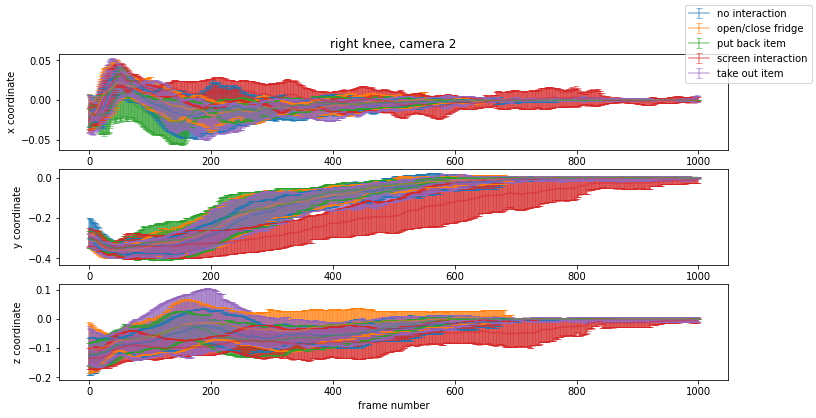

In [123]:
# sept 13 plot 

# combine into 1 errorbar plot

activities=[0,1,2,3,4]

fig, ax = plt.subplots(3, 1, figsize=(12, 6))


timevec = np.arange(smax_t)

# x
for a in activities:
    print(a)
    xseries_t = x_allperson_averaged[a]
    xstd_t = x_allperson_std[a]
    # uplims=True, lolims=True,
    ax[0].errorbar(timevec, xseries_t, yerr=xstd_t,alpha=0.5,capsize=3) #mark markersize=1) #uplims=True, lolims=True)
    yseries_t = y_allperson_averaged[a]
    ystd_t = y_allperson_std[a]
    zseries_t = z_allperson_averaged[a]
    zstd_t = z_allperson_std[a]
    ax[1].errorbar(timevec, yseries_t, yerr=ystd_t, alpha=0.5,capsize=3)# , marker=".", markersize=1)
    ax[2].errorbar(timevec, zseries_t, yerr=zstd_t, alpha=0.5,capsize=3)#, marker=".", markersize=1)
    
    
    #plt.scatter(timevec, xseries_t)


ax[0].set_ylabel("x coordinate", fontsize=10)
ax[1].set_ylabel("y coordinate", fontsize=10)
ax[2].set_xlabel("frame number", fontsize=10)
ax[2].set_ylabel("z coordinate", fontsize=10)

ax[0].set_title("right knee, camera 2")

"""ax[0].set_xlim((0,200))
ax[1].set_xlim((0,200))
ax[2].set_xlim((0,200))"""

#plt.xlim((0, 200))


labels = ["no interaction", "open/close fridge", "put back item", "screen interaction", "take out item"]

fig.legend(labels, loc='upper right')

plt.show()



0
1
2
3
4


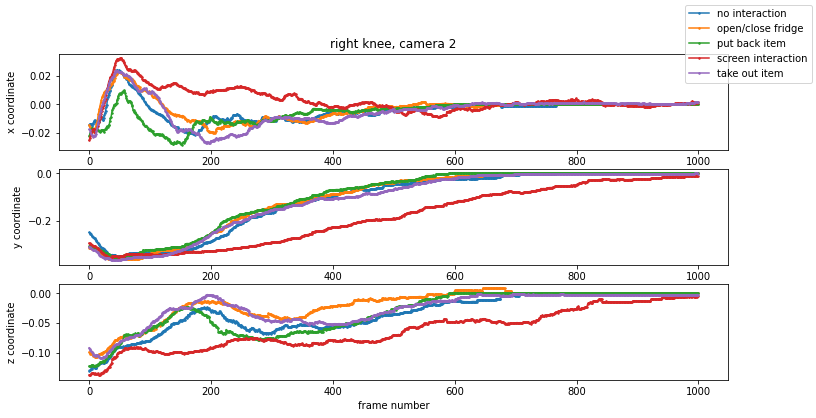

In [124]:
# sept 14 plot 

# combine into 1 errorbar plot

activities=[0,1,2,3,4]

fig, ax = plt.subplots(3, 1, figsize=(12, 6))


timevec = np.arange(smax_t)

# x
for a in activities:
    print(a)
    xseries_t = x_allperson_averaged[a]
    ax[0].plot(timevec, xseries_t, marker=".", markersize=3)
    
    yseries_t = y_allperson_averaged[a]
    ax[1].plot(timevec, yseries_t, marker=".", markersize=3)
    
    zseries_t = z_allperson_averaged[a]
    ax[2].plot(timevec, zseries_t, marker=".", markersize=3)


ax[0].set_ylabel("x coordinate", fontsize=10)
ax[1].set_ylabel("y coordinate", fontsize=10)
ax[2].set_xlabel("frame number", fontsize=10)
ax[2].set_ylabel("z coordinate", fontsize=10)

ax[0].set_title("right knee, camera 2")

"""ax[0].set_xlim((0,200))
ax[1].set_xlim((0,200))
ax[2].set_xlim((0,200))"""

#plt.xlim((0, 200))


labels = ["no interaction", "open/close fridge", "put back item", "screen interaction", "take out item"]

fig.legend(labels, loc='upper right')

plt.show()




Text(0.5, 0.98, 'put back item')

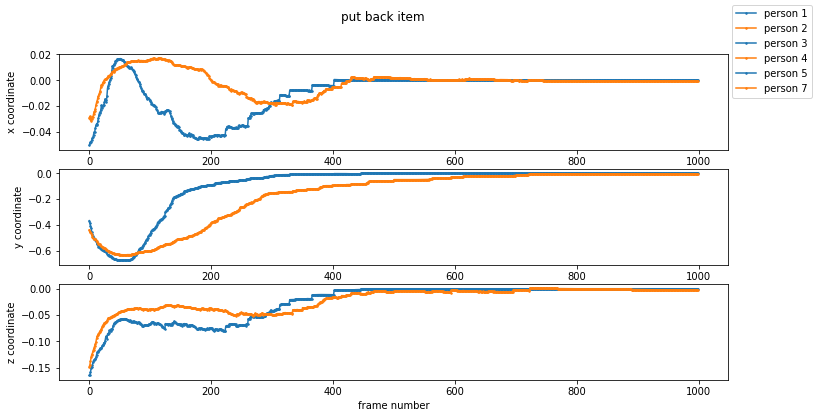

In [38]:
# same x,y,z plot: open/close fridge + screen interaction 

#minhui plot


fig, ax = plt.subplots(3, 1, figsize=(12, 6))



ax[0].plot(timevec, open_close_x, marker=".", markersize=3)
ax[1].plot(timevec, open_close_y, marker=".", markersize=3)
ax[2].plot(timevec, open_close_z, marker=".", markersize=3)

ax[0].plot(timevec, screen_int_x, marker=".", markersize=3)
ax[1].plot(timevec, screen_int_y, marker=".", markersize=3)
ax[2].plot(timevec, screen_int_z, marker=".", markersize=3)

ax[0].set_ylabel("x coordinate", fontsize=10)
ax[1].set_ylabel("y coordinate", fontsize=10)
ax[2].set_xlabel("frame number", fontsize=10)
ax[2].set_ylabel("z coordinate", fontsize=10)

labels = ["person 1", "person 2", "person 3", "person 4", "person 5", "person 7", "person 8",
          "person 9"]
# labels_first5 = ["person 1", "person 2", "person 3", "person 4", "person 5"]
fig.legend(labels, loc='upper right')
fig.suptitle("put back item")


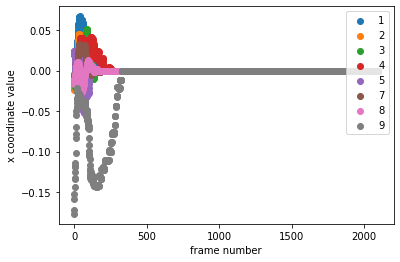

In [107]:
# plot 
timevec = np.arange(smax_t)


# add legend

# x
for p in persons:
    xseries_t = x_tot[p]
    plt.scatter(timevec, xseries_t, label=p)

plt.legend(loc='upper right')

plt.xlabel("frame number")
plt.ylabel("x coordinate value")
plt.show()

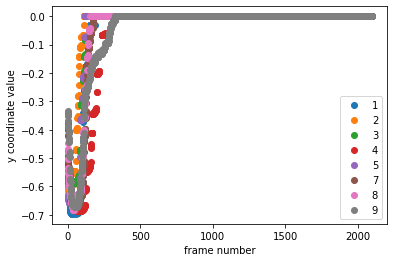

In [108]:
for p in persons:
    yseries_t = y_tot[p]
    plt.scatter(timevec, yseries_t, label=p)
    
plt.legend(loc='lower right')

plt.xlabel("frame number")
plt.ylabel("y coordinate value")
plt.show()

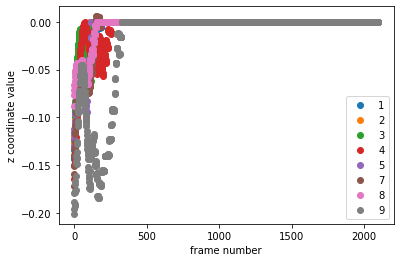

In [109]:
for p in persons:
    zseries_t = z_tot[p]
    plt.scatter(timevec, zseries_t, label=p)

plt.legend(loc='lower right')

plt.xlabel("frame number")
plt.ylabel("z coordinate value")

plt.show()

In [110]:
smax_t

2100

In [ ]:
max_t = [ 446, 6100, 2100]

kypt

Text(0.5, 0.98, 'put back item')

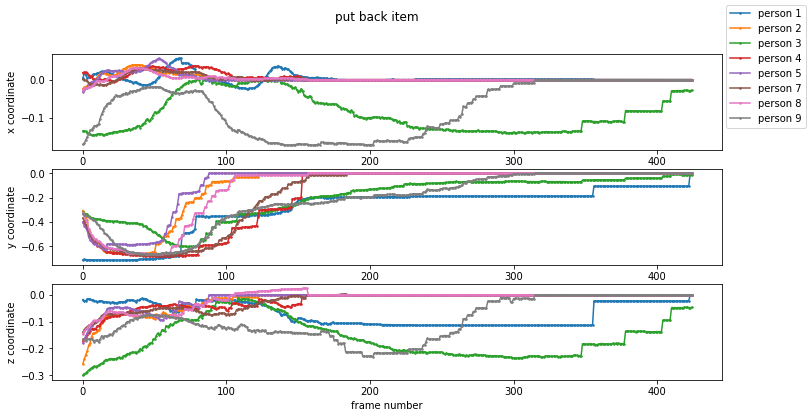

In [100]:
#minhui plot


fig, ax = plt.subplots(3, 1, figsize=(12, 6))

people = [1, 2, 3, 4, 5, 7, 8, 9]

for p in people:
    xseries_total = x_tot[p]
    yseries_total = y_tot[p]
    zseries_total = z_tot[p]
    ax[0].plot(timevec, xseries_total, marker=".", markersize=3)
    ax[1].plot(timevec, yseries_total, marker=".", markersize=3)
    ax[2].plot(timevec, zseries_total, marker=".", markersize=3)

ax[0].set_ylabel("x coordinate", fontsize=10)
ax[1].set_ylabel("y coordinate", fontsize=10)
ax[2].set_xlabel("frame number", fontsize=10)
ax[2].set_ylabel("z coordinate", fontsize=10)

labels = ["person 1", "person 2", "person 3", "person 4", "person 5", "person 7", "person 8",
          "person 9"]
# labels_first5 = ["person 1", "person 2", "person 3", "person 4", "person 5"]
fig.legend(labels, loc='upper right')
fig.suptitle("put back item")

In [ ]:
# fix error bar plot https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html


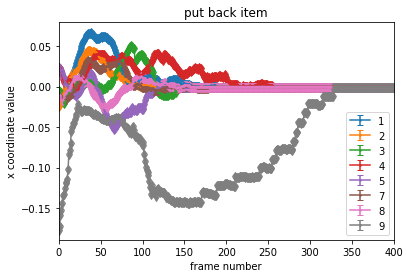

In [114]:
# error bar plot

timevec = np.arange(smax_t)

# x
for p in persons:
    xseries_t = x_tot[p]
    xstd_t = x_std[p]
    plt.errorbar(timevec, xseries_t, yerr=xstd_t, uplims=True, lolims=True, label=p, marker=".", markersize=3) #uplims=True, lolims=True)
    #plt.scatter(timevec, xseries_t)

plt.legend(loc='lower right')

plt.xlabel("frame number")
plt.ylabel("x coordinate value")
plt.title("put back item")

plt.xlim((0, 400))

plt.show()

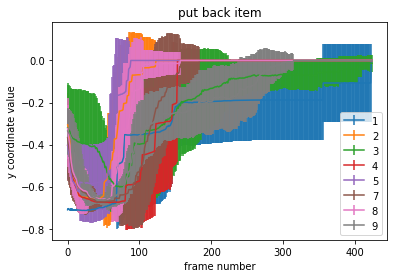

In [104]:
for p in persons:
    yseries_t = y_tot[p]
    ystd_t = y_std[p]
    plt.errorbar(timevec, yseries_t, yerr=ystd_t, label=p)
    #plt.scatter(timevec, xseries_t)

plt.legend(loc='lower right')

plt.xlabel("frame number")
plt.ylabel("y coordinate value")
plt.title("put back item")
plt.show()

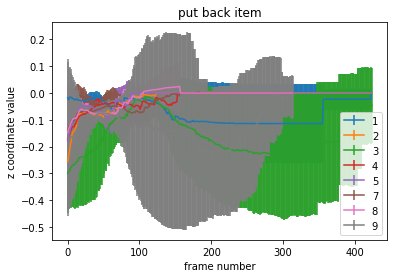

In [105]:
for p in persons:
    zseries_t = z_tot[p]
    zstd_t = z_std[p]
    plt.errorbar(timevec, zseries_t, yerr=zstd_t, label=p)# uplims=True, lolims=True )
    #plt.scatter(timevec, xseries_t)
plt.legend(loc='lower right')

plt.xlabel("frame number")
plt.ylabel("z coordinate value")
plt.title("put back item")
plt.show()

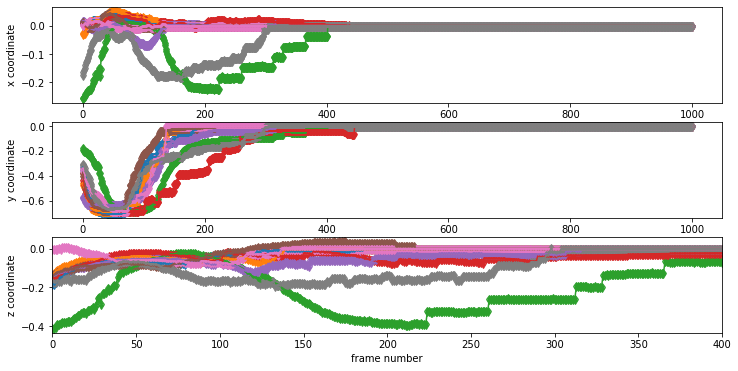

In [121]:
# combine into 1 errorbar plot


fig, ax = plt.subplots(3, 1, figsize=(12, 6))


timevec = np.arange(smax_t)

# x
for p in persons:
    xseries_t = x_tot[p]
    xstd_t = x_std[p]
    ax[0].errorbar(timevec, xseries_t, yerr=xstd_t, uplims=True, lolims=True, label=p, marker=".", markersize=3) #uplims=True, lolims=True)
    yseries_t = y_tot[p]
    ystd_t = y_std[p]
    zseries_t = z_tot[p]
    zstd_t = z_std[p]
    ax[1].errorbar(timevec, yseries_t, yerr=ystd_t, uplims=True, lolims=True, label=p, marker=".", markersize=3)
    ax[2].errorbar(timevec, zseries_t, yerr=zstd_t, uplims=True, lolims=True, label=p, marker=".", markersize=3)
    
    
    #plt.scatter(timevec, xseries_t)

"""plt.legend(loc='lower right')

plt.xlabel("frame number")
plt.ylabel("x coordinate value")
plt.title("put back item")"""
ax[0].set_ylabel("x coordinate", fontsize=10)
ax[1].set_ylabel("y coordinate", fontsize=10)
ax[2].set_xlabel("frame number", fontsize=10)
ax[2].set_ylabel("z coordinate", fontsize=10)

plt.xlim((0, 400))

plt.show()


In [ ]:
# FFT
# https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html

from scipy.fft import fft, ifft


In [ ]:
# phase and fft 
spectrum = fft(self.signal)
magnitude = np.abs(spectrum)
phase = np.angle(spectrum)

In [15]:
# save current x,y,z into map or matrix : use 500 frames 

screen_interaction_x = {}
screen_interaction_y = {}
screen_interaction_z = {}

In [16]:
screen_interaction_x =  x_tot
screen_interaction_y =  y_tot
screen_interaction_z = z_tot

In [19]:
screen_interaction_y_cut = {}
# cut off at frame 500
#a =[ 1,2,3,4,5,6,7]
#a[:4] is [1,2,3,4]
p=1
for s in screen_interaction_y:
    series = screen_interaction_y[s]
    series_cut = series[:500]
    screen_interaction_y_cut[p] = series_cut
    p=p+1
    

In [27]:
# transform into matrices
# focus on y series
a3 = []
labels3 = []
dirnum = 3

for s in screen_interaction_y_cut:
    file_series = screen_interaction_y_cut[s]
    
    nr = np.shape(file_series)[0]
    print("nr is", nr)
    # add to some array
    a3.append(file_series)
    
    """if len(a3)==0:
        a3 = file_series
    else:
        a3.append(file_series)"""
    labels3 += [dirnum]


nr is 500
nr is 500
nr is 500
nr is 500
nr is 500


In [26]:
np.shape(a3)

(5, 500)

In [28]:
labels3

[3, 3, 3, 3, 3]

In [58]:
# sept 8 input is activity and persons

persons = [1,2,3,4,5] #[2,3,4,5,7]


x_tot= {}
y_tot= {}
z_tot= {}

x_std = {}
y_std={}
z_std={}

#maxs =[]
smax_t = 500

# same as above but save matrices after knowing the max # rows/frames
for p in persons:
    # make map of matrix results
    matmap = {}
    
    rootdir = rootdir4+"/"+str(p)

    nfiles= 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            npath = os.path.join(subdir, file)
            
            
            if file.endswith(("1.mp4.npy")):
                print(npath)
                nfiles=nfiles+1
                
                trimmed_res = trim(npath)
                # shape
                s0 = np.shape(trimmed_res)[0]
                
                if s0 > smax_t:
                    trimmed_res = trimmed_res[:smax_t]
                
                if s0 < smax_t:
                    z51 = np.zeros(51)
                    # append NA or -inf

                    minus = smax_t - s0
                    for i in range(minus):
                        trimmed_res= np.vstack((trimmed_res,z51))
                    
                
                matmap[nfiles] = trimmed_res
    
    xseries_tot =[]
    yseries_tot =[]
    zseries_tot =[]
    
    numvideos = nfiles

    for i in range(1, numvideos): #numvideos):

        video_mat = matmap[i]

        xseries=[]
        yseries=[]
        zseries =[]
        for row in video_mat:
        # use indices to locate keypt x,y,z 
            rowx= row[kypt_loc]
            rowy= row[kypt_y]
            rowz= row[kypt_z]
            xseries.append(rowx)
            yseries.append(rowy)
            zseries.append(rowz)

        # take average

        #print("xseries prev", xseries_tot)
        #print("xseries curr", xseries )
        
        xseries_tot.append(xseries)
        yseries_tot.append(yseries)
        zseries_tot.append(zseries)

    
    """samp_data_x = np.array(xseries_tot)
    xaved = np.average(samp_data_x, axis=0)
    
    stdx = np.std(samp_data_x, axis=0)
    
    samp_data_y = np.array(yseries_tot)
    yaved = np.average(samp_data_y, axis=0)
    
    stdy = np.std(samp_data_y, axis=0)
    
    samp_data_z = np.array(zseries_tot)
    zaved = np.average(samp_data_z, axis=0)
    
    stdz = np.std(samp_data_z, axis=0)"""

    x_tot[p] = xseries_tot
    y_tot[p] = yseries_tot
    z_tot[p] = zseries_tot
    
    """x_std[p] = stdx
    y_std[p] = stdy
    z_std[p] = stdz"""
        
                

take_out_item/1/take_out_item_2_1613085871_1.mp4.npy
take_out_item/1/take_out_item_2_1613085871_1.mp4.npy entry_idx: 69, exit_idx: 183, tot: 451
take_out_item/1/take_out_item_5_1613086029_1.mp4.npy
take_out_item/1/take_out_item_5_1613086029_1.mp4.npy entry_idx: 7, exit_idx: 143, tot: 407
take_out_item/1/take_out_item_14_1615394584_1.mp4.npy
take_out_item/1/take_out_item_14_1615394584_1.mp4.npy entry_idx: 29, exit_idx: 137, tot: 342
take_out_item/1/take_out_item_7_1615394230_1.mp4.npy
take_out_item/1/take_out_item_7_1615394230_1.mp4.npy entry_idx: 22, exit_idx: 108, tot: 319
take_out_item/1/take_out_item_10_1615394383_1.mp4.npy
take_out_item/1/take_out_item_10_1615394383_1.mp4.npy entry_idx: 32, exit_idx: 110, tot: 327
take_out_item/1/take_out_item_6_1615394179_1.mp4.npy
take_out_item/1/take_out_item_6_1615394179_1.mp4.npy entry_idx: 23, exit_idx: 126, tot: 345
take_out_item/1/take_out_item_4_1615394074_1.mp4.npy
take_out_item/1/take_out_item_4_1615394074_1.mp4.npy entry_idx: 22, exit_i

take_out_item/4/take_out_item_3_1616179525_1.mp4.npy entry_idx: 27, exit_idx: 148, tot: 451
take_out_item/4/take_out_item_4_1616179807_1.mp4.npy
take_out_item/4/take_out_item_4_1616179807_1.mp4.npy entry_idx: 21, exit_idx: 278, tot: 615
take_out_item/4/take_out_item_9_1616180332_1.mp4.npy
take_out_item/4/take_out_item_9_1616180332_1.mp4.npy entry_idx: 34, exit_idx: 233, tot: 529
take_out_item/4/take_out_item_8_1616180240_1.mp4.npy
take_out_item/4/take_out_item_8_1616180240_1.mp4.npy entry_idx: 26, exit_idx: 197, tot: 487
take_out_item/4/take_out_item_1_1616179317_1.mp4.npy
take_out_item/4/take_out_item_1_1616179317_1.mp4.npy entry_idx: 5, exit_idx: 151, tot: 434
take_out_item/5/take_out_item_7_1625857324_1.mp4.npy
take_out_item/5/take_out_item_7_1625857324_1.mp4.npy entry_idx: 25, exit_idx: 127, tot: 370
take_out_item/5/take_out_item_8_1625857374_1.mp4.npy
take_out_item/5/take_out_item_8_1625857374_1.mp4.npy entry_idx: 19, exit_idx: 123, tot: 309
take_out_item/5/take_out_item_1_1625857

In [59]:
# make into 1 function
activity_x = x_tot
activity_y = y_tot
activity_z = z_tot


In [ ]:
# matrices :

In [44]:
# transform into matrices
# focus on y series
a3 = []
labels3 = []
dirnum = 3

for s in activity_y:
    file_series = activity_y[s]
    
    nr = np.shape(file_series)[0]
    print("nr is", nr)
    
    # add to some array
    a3.extend(file_series)
    
    labels3 += nr*[dirnum]


nr is 20
nr is 10
nr is 9
nr is 11
nr is 41


In [38]:
np.shape(activity_y[2])

(20, 500)

In [50]:
np.shape(a3)

(91, 500)

In [45]:
np.shape(labels3)

(91,)

In [48]:

a0 = []
labels0 = []
dirnum = 0

for s in activity_y:
    file_series = activity_y[s]
    
    nr = np.shape(file_series)[0]
    print("nr is", nr)
    
    # add to some array
    a0.extend(file_series)
    
    labels0 += nr*[dirnum]

nr is 20
nr is 10
nr is 9
nr is 10
nr is 41


In [49]:
np.shape(a0)

(90, 500)

In [51]:
np.shape(labels0)

(90,)

In [54]:
dirnum = 1
a1 = []
labels1 = []


for s in activity_y:
    file_series = activity_y[s]
    
    nr = np.shape(file_series)[0]
    print("nr is", nr)
    
    # add to some array
    a1.extend(file_series)
    
    labels1 += nr*[dirnum]

nr is 27
nr is 17
nr is 7
nr is 9
nr is 17


In [57]:
dirnum = 2
a2 = []
labels2 = []


for s in activity_y:
    file_series = activity_y[s]
    
    nr = np.shape(file_series)[0]
    print("nr is", nr)
    
    # add to some array
    a2.extend(file_series)
    
    labels2 += nr*[dirnum]

nr is 4
nr is 19
nr is 10
nr is 9
nr is 11


In [60]:
dirnum = 4
a4 = []
labels4 = []


for s in activity_y:
    file_series = activity_y[s]
    
    nr = np.shape(file_series)[0]
    print("nr is", nr)
    
    # add to some array
    a4.extend(file_series)
    
    labels4 += nr*[dirnum]

nr is 23
nr is 18
nr is 8
nr is 10
nr is 9


In [61]:
# join all matrices

all_x = np.concatenate((a0, a1, a2, a3, a4), axis=0)
all_y = np.concatenate((labels0, labels1, labels2, labels3, labels4), axis=0)


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.3, random_state=42)

In [63]:
import pyts
# https://pyts.readthedocs.io/en/latest/auto_examples/classification/plot_learning_shapelets.html#sphx-glr-auto-examples-classification-plot-learning-shapelets-py
import matplotlib.pyplot as plt
import numpy as np
from pyts.classification import LearningShapelets
#from pyts.datasets import load_gunpoint
from pyts.utils import windowed_view

In [64]:
clf = LearningShapelets(random_state=42, tol=0.01)

In [65]:
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3 4], y=[4 3 3 3 2 4 1 3 2 0 3 0 3 0 1 3 0 3 3 2 2 0 1 3 0 3 4 0 2 1 0 4 3 4 2 1 1
 0 2 1 2 1 0 1 1 1 3 1 3 0 0 0 1 1 0 3 2 3 3 2 1 1 4 0 4 4 4 3 3 2 3 3 2 3
 1 0 0 3 2 2 1 2 3 3 1 4 4 3 4 1 3 1 1 2 2 4 0 2 1 2 2 0 1 3 3 3 4 1 0 3 0
 0 4 1 3 3 1 2 3 0 4 0 3 0 2 0 1 0 0 0 2 1 3 3 1 3 3 1 1 4 0 3 3 3 2 0 3 2
 3 4 0 3 4 1 3 4 2 2 1 2 0 0 0 3 2 4 0 3 3 3 1 4 1 0 1 1 0 0 0 1 0 4 3 2 3
 4 3 2 2 3 4 3 4 4 3 3 2 1 0 2 2 3 3 1 0 0 0 0 2 0 3 1 0 3 3 0 4 0 3 1 4 4
 1 3 4 4 3 0 0 2 2 4 2 2 0 0 4 3 3 0 4 1 3 2 3 4 3 3 1 1 1 4 1 0 4 2 1 4 0
 2 0 1 3 4 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarr

LearningShapelets(random_state=42, tol=0.01)

In [66]:
clf.score(X_test, y_test)

0.2982456140350877

In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(all_x, all_y, test_size=0.3, random_state=12)

In [68]:
clf.score(X_test2, y_test2)

0.3333333333333333

In [69]:
from pyts.classification import BOSSVS

clf = BOSSVS(window_size=500)

In [70]:
clf.fit(X_train, y_train)

BOSSVS(window_size=500)

In [71]:
clf.score(X_test, y_test)

0.3157894736842105